<a href="https://colab.research.google.com/github/Anilo99/Anilo99/blob/main/Img_Class_CNN_CIPHER_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import keras 
from  keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation
from keras import regularizers,optimizers
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
(x_train,y_train),(x_test,y_test) =cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


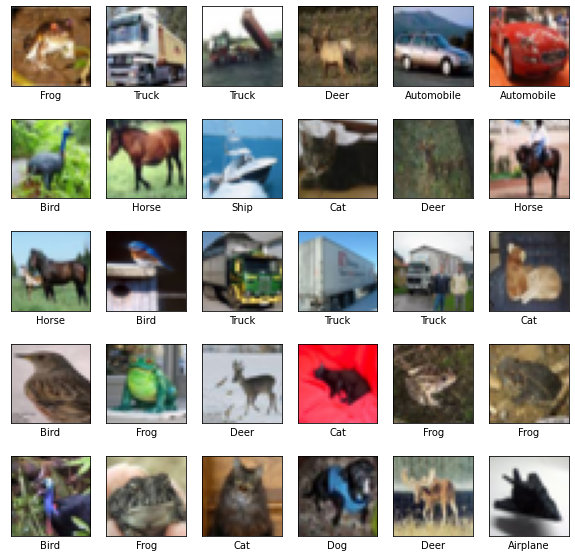

In [4]:
col_label=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

fig=plt.figure(figsize=(10,10))
for i in  range(30):
 ax=fig.add_subplot(5,6,i+1,xticks=[],yticks=[])
 ax.imshow(np.squeeze(x_train[i]))
 plt.xlabel(col_label[np.squeeze(y_train[i])])

In [5]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [6]:
class_num=len(np.unique(y_test))
y_train=np_utils.to_categorical(y_train,class_num)
y_test=np_utils.to_categorical(y_test,class_num)

In [7]:
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]
print(x_valid.shape)
print(x_train.shape)
print(x_test.shape)

(5000, 32, 32, 3)
(45000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
datagen = ImageDataGenerator( 
 rotation_range=15,
 width_shift_range=0.1,
 height_shift_range=0.1,
 horizontal_flip=True,
 vertical_flip=False
 )
datagen.fit(x_train)

In [9]:
base_hidden_layer=32
weight_decay=1e-6

In [12]:
model=Sequential()

#COV1
model.add(Conv2D(filters=base_hidden_layer,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay),input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#COV2
model.add(Conv2D(filters=base_hidden_layer,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#COV3
model.add(Conv2D(filters=base_hidden_layer*2,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#COV4
model.add(Conv2D(filters=base_hidden_layer*2,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#COV5
model.add(Conv2D(filters=base_hidden_layer*4,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#COV6
model.add(Conv2D(filters=base_hidden_layer*4,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_11 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

In [13]:
adam=Adam(learning_rate=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
print(x_valid.shape)
print(x_train.shape)
print(x_test.shape)

(5000, 32, 32, 3)
(45000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
batch_size=256
epochs=100

In [16]:
checkpointer=ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)

history = model.fit_generator(datagen.flow(x_train, y_train, 
batch_size=batch_size), callbacks=[checkpointer], 
steps_per_epoch=x_train.shape[0] // batch_size, epochs=epochs, 
verbose=2, validation_data=(x_valid, y_valid)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100

Epoch 00001: val_loss improved from inf to 3.61406, saving model to model.weights.best.hdf5
175/175 - 40s - loss: 2.0471 - accuracy: 0.3773 - val_loss: 3.6141 - val_accuracy: 0.1248 - 40s/epoch - 229ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 3.61406 to 3.29145, saving model to model.weights.best.hdf5
175/175 - 29s - loss: 1.5523 - accuracy: 0.5067 - val_loss: 3.2914 - val_accuracy: 0.1790 - 29s/epoch - 164ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 3.29145 to 1.88038, saving model to model.weights.best.hdf5
175/175 - 30s - loss: 1.3680 - accuracy: 0.5700 - val_loss: 1.8804 - val_accuracy: 0.4210 - 30s/epoch - 169ms/step
Epoch 4/100

Epoch 00004: val_loss improved from 1.88038 to 1.81001, saving model to model.weights.best.hdf5
175/175 - 30s - loss: 1.2614 - accuracy: 0.6077 - val_loss: 1.8100 - val_accuracy: 0.4626 - 30s/epoch - 169ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 1.81001 to 1.06565, saving model to model.weights.best.hdf5

In [18]:
ls

model.weights.best.hdf5  sample_data/


In [25]:
model.load_weights('model.weights.best.hdf5')
scores = model.evaluate(x_test, y_test, batch_size=256, verbose=1)
print('\nTest result: %.2f loss: %.2f' % (scores[1]*100,scores[0]))

40/40 [==============================] - 1s 21ms/step - loss: 0.3890 - accuracy: 0.8766

Test result: 87.66 loss: 0.39


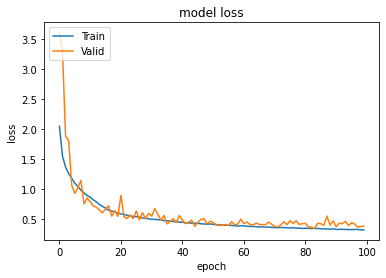

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

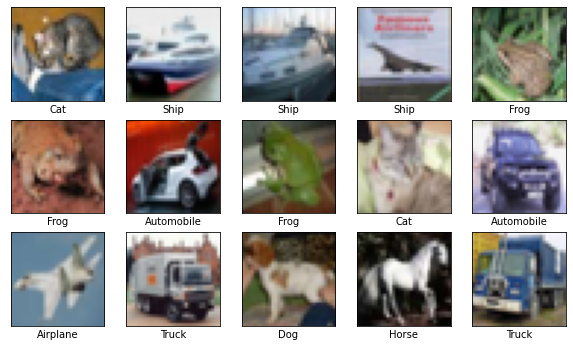

In [44]:
predictionsInd = np.argmax(model.predict(x_test[:16]),1)

fig=plt.figure(figsize=(10,10))
for i in  range(15):
 ax=fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
 ax.imshow(np.squeeze(x_test[i]))
 plt.xlabel(col_label[predictionsInd[i]])
